In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

> The Code above provided by udacity was just copied here, because Twitter didn't allow me to apply for a developer account.

In [2]:
# import libraries
import requests
import os
import json
import pandas as pd
import numpy as np
import datetime
import re
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# not truncate strings in cells
pd.set_option('display.max_colwidth', -1)

In [3]:
# download image prediction file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
r  # if  [200] is returned, it was successfull

<Response [200]>

In [4]:
# save requested file
with open('image_predictions.tsv', 'wb') as f:
    f.write(r.content)
# create and show dataframe
predictions = pd.read_csv('image_predictions.tsv', sep='\t')
predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [5]:
# import twitter archive
archive = pd.read_csv('twitter-archive-enhanced.csv')
archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None


In [6]:
# read in json.txt
twitter_feed = pd.read_json('tweet-json.txt', lines=True)
twitter_feed.head(2)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","{'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 1407, 'h': 1600, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 598, 'h': 680, 'resize': 'fit'}, 'medium': {'w': 1055, 'h': 1200, 'resize': 'fit'}}}]}","{'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 1407, 'h': 1600, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 598, 'h': 680, 'resize': 'fit'}, 'medium': {'w': 1055, 'h': 1200, 'resize': 'fit'}}}]}","<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [7]:
# listing columns to decide, which data to keep
twitter_feed.columns
# most data already in twitter archive, so just keep id, favorite_dount and retweet_count

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status'],
      dtype='object')

In [8]:
# creating dataframe with columns of interest
counts = twitter_feed[['id', 'favorite_count', 'retweet_count']]
counts.head()

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


# Assesing

>Besides the assessing below, the date also were visually assessed using MS Excel.


### image predictions ###

In [9]:
predictions.sample(20)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
785,690248561355657216,https://pbs.twimg.com/media/CZRBZ9mWkAAWblt.jpg,1,motor_scooter,0.382690,False,moped,0.318017,False,pickup,0.040625,False
506,675898130735476737,https://pbs.twimg.com/media/CWFFt3_XIAArIYK.jpg,1,Labrador_retriever,0.407430,True,malinois,0.077037,True,pug,0.074597,True
803,691483041324204033,https://pbs.twimg.com/media/CZikKBIWYAA40Az.jpg,1,bloodhound,0.886232,True,black-and-tan_coonhound,0.077420,True,Gordon_setter,0.009826,True
827,693486665285931008,https://pbs.twimg.com/ext_tw_video_thumb/693486485266247680/pu/img/KhapmUYPQTpbwNf8.jpg,1,sea_lion,0.519811,False,Siamese_cat,0.290971,False,black-footed_ferret,0.039967,False
532,676864501615042560,https://pbs.twimg.com/media/CWS0q8iU8AE2Srr.jpg,1,Chesapeake_Bay_retriever,0.371146,True,water_buffalo,0.099596,False,Weimaraner,0.048968,True
1053,714214115368108032,https://pbs.twimg.com/media/Cell8ikWIAACCJ-.jpg,1,pug,0.533967,True,bloodhound,0.164826,True,German_shepherd,0.046524,True
945,704480331685040129,https://pbs.twimg.com/media/CcbRIAgXIAQaKHQ.jpg,1,Samoyed,0.979206,True,Pomeranian,0.007185,True,Arctic_fox,0.006438,False
1137,728986383096946689,https://pbs.twimg.com/media/Ch3hOGWUYAE7w0y.jpg,2,Maltese_dog,0.952070,True,toy_poodle,0.027271,True,miniature_poodle,0.004874,True
1440,774757898236878852,https://pbs.twimg.com/media/CsB-MYiXgAEQU20.jpg,1,toy_poodle,0.719941,True,miniature_poodle,0.251546,True,Lakeland_terrier,0.007008,True
1740,822489057087389700,https://pbs.twimg.com/media/C2oRbOuWEAAbVSl.jpg,1,Samoyed,0.416769,True,malamute,0.252706,True,kuvasz,0.157028,True


In [10]:
predictions.info()
# no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
predictions.tweet_id.duplicated().sum()
# no duplicated id

0

In [12]:
predictions.describe()
# there is one image with p=1.0, worth to check

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [13]:
predictions[predictions.p1_conf == 1]
# dog sitting behind jigsaw puzzle

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
106,667866724293877760,https://pbs.twimg.com/media/CUS9PlUWwAANeAD.jpg,1,jigsaw_puzzle,1.0,False,prayer_rug,1.011300e-08,False,doormat,1.740170e-10,False


In [14]:
predictions.img_num.value_counts()


1    1780
2    198 
3    66  
4    31  
Name: img_num, dtype: int64

In [15]:
predictions[predictions.img_num == 4]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
144,668623201287675904,https://pbs.twimg.com/media/CUdtP1xUYAIeBnE.jpg,4,Chihuahua,0.708163,True,Pomeranian,0.091372,True,titi,0.067325,False
779,689905486972461056,https://pbs.twimg.com/media/CZMJYCRVAAE35Wk.jpg,4,Pomeranian,0.943331,True,Shetland_sheepdog,0.023675,True,chow,0.007165,True
1024,710588934686908417,https://pbs.twimg.com/media/CdyE2x1W8AAe0TG.jpg,4,Pembroke,0.982004,True,Cardigan,0.008943,True,malamute,0.007550,True
1161,734787690684657664,https://pbs.twimg.com/media/CjJ9gQ1WgAAXQtJ.jpg,4,golden_retriever,0.883991,True,chow,0.023542,True,Labrador_retriever,0.016056,True
1286,750868782890057730,https://pbs.twimg.com/media/CmufLLsXYAAsU0r.jpg,4,toy_poodle,0.912648,True,miniature_poodle,0.035059,True,seat_belt,0.026376,False
1325,756998049151549440,https://pbs.twimg.com/media/CoFlsGAWgAA2YeV.jpg,4,golden_retriever,0.678555,True,Labrador_retriever,0.072632,True,Border_terrier,0.049033,True
1337,758405701903519748,https://pbs.twimg.com/media/CoZl9fXWgAMox0n.jpg,4,Chesapeake_Bay_retriever,0.702954,True,laptop,0.092277,False,notebook,0.032727,False
1342,758854675097526272,https://pbs.twimg.com/media/Cof-SuqVYAAs4kZ.jpg,4,barrow,0.974047,False,Old_English_sheepdog,0.023791,True,komondor,0.001246,True
1372,762464539388485633,https://pbs.twimg.com/media/CpTRc4DUEAAYTq6.jpg,4,chow,0.999953,True,Tibetan_mastiff,0.000023,True,dhole,0.000003,False
1437,773985732834758656,https://pbs.twimg.com/media/Cr2_6R8WAAAUMtc.jpg,4,giant_panda,0.451149,False,fur_coat,0.148001,False,pug,0.109570,True


> There are images where no dog was recognized.

In [16]:
# all rows that have prediction of no dog in first prediction
p1_false = predictions.query('p1_dog !=True')
p1_false
# that were more than I expected

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2026,882045870035918850,https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg,1,web_site,0.949591,False,dhole,0.017326,False,golden_retriever,0.006941,True
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/887517108413886465/pu/img/WanJKwssZj4VJvL9.jpg,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False


In [17]:
# rows where all predictions rate no dog
all_false = predictions.query('p1_dog !=True & p2_dog !=True & p3_dog !=True')
all_false.sample(20)
# controlling some images, sometimes Dog but not good to discriminate
# is there a way to identify pics with dogs with help of other data?


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
753,688179443353796608,https://pbs.twimg.com/media/CYznjAcUEAQ5Zq7.jpg,1,sorrel,0.811520,False,horse_cart,0.024820,False,Arabian_camel,0.015155,False
974,706901761596989440,https://pbs.twimg.com/media/Cc9rZlBWwAA56Ra.jpg,1,wild_boar,0.859499,False,hog,0.128981,False,warthog,0.011318,False
1696,816450570814898180,https://pbs.twimg.com/media/C1SddosXUAQcVR1.jpg,1,web_site,0.352857,False,envelope,0.060107,False,nail,0.031291,False
647,681679526984871937,https://pbs.twimg.com/media/CXXP5O4WEAA4dgS.jpg,1,birdhouse,0.472351,False,teddy,0.142058,False,pot,0.032906,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
1040,712092745624633345,https://pbs.twimg.com/media/CeHckpuW4AAF7rT.jpg,1,triceratops,0.235373,False,llama,0.153126,False,three-toed_sloth,0.111840,False
1413,771004394259247104,https://pbs.twimg.com/media/CrMmVqyWcAIDCHI.jpg,1,home_theater,0.414338,False,iPod,0.052741,False,pop_bottle,0.048821,False
1887,847971574464610304,https://pbs.twimg.com/media/C8SZH1EWAAAIRRF.jpg,1,coffee_mug,0.633652,False,cup,0.273392,False,toilet_tissue,0.066656,False
840,694669722378485760,https://pbs.twimg.com/media/CaP2bS8WYAAsMdx.jpg,2,beaver,0.457094,False,mongoose,0.228298,False,marmot,0.148309,False
118,668154635664932864,https://pbs.twimg.com/media/CUXDGR2WcAAUQKz.jpg,1,Arctic_fox,0.473584,False,wallaby,0.261411,False,white_wolf,0.080948,False


## favorite and retweet counts ##

In [18]:
counts.sample(20)
# some have 0 favorite counts, why? 

,id,favorite_count,retweet_count
1211,715220193576927233,2630,736
1658,683078886620553216,2176,634
1664,682697186228989953,1440,397
1354,703425003149250560,4162,1559
241,846153765933735936,34394,10226
2023,671882082306625538,3693,1488
436,820078625395449857,21979,7246
766,777641927919427584,0,4947
1908,674416750885273600,731,157
2007,672254177670729728,1515,800


In [19]:
counts.info()
# no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.3 KB


In [20]:
counts.describe()


,id,favorite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


In [21]:
counts.id.duplicated().sum()
# 

0

## archive ##

In [22]:
archive.sample(20)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
272,840761248237133825,NaN,NaN,2017-03-12 03:07:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: Say hello to Maddie and Gunner. They are considerably pupset about bath time. Both 12/10 but Gunner needs your help\n\nhttps:/…,8.406323e+17,4.196984e+09,2017-03-11 18:35:42 +0000,"https://www.gofundme.com/3hgsuu0,https://twitter.com/dog_rates/status/840632337062862849/photo/1",12,10,Maddie,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
1743,679405845277462528,NaN,NaN,2015-12-22 20:59:10 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",Crazy unseen footage from Jurassic Park. 10/10 for both dinosaur puppers https://t.co/L8wt2IpwxO,NaN,NaN,NaN,https://vine.co/v/iKVFEigMLxP,10,10,None,None,None,None,None
2201,668645506898350081,NaN,NaN,2015-11-23 04:21:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Incredibly rare dog here. Good at bipedalism. Rad blue spikes. Ready to dance. 11/10 https://t.co/70X1TIXn38,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668645506898350081/photo/1,11,10,None,None,None,None,None
752,778990705243029504,NaN,NaN,2016-09-22 16:13:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Jay. He's really h*ckin happy about the start of fall. Sneaky tongue slip in 2nd pic. 11/10 snuggly af https://t.co/vyx1X5eyWI,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/778990705243029504/photo/1,https://twitter.com/dog_rates/status/778990705243029504/photo/1",11,10,Jay,None,None,None,None
821,770293558247038976,NaN,NaN,2016-08-29 16:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Jackson. There's nothing abnormal about him. Just your average really good dog. 10/10 https://t.co/3fEPpj0KYw,NaN,NaN,NaN,https://twitter.com/dog_rates/status/770293558247038976/photo/1,10,10,Jackson,None,None,None,None
2283,667200525029539841,NaN,NaN,2015-11-19 04:39:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Joshwa. He is a fuckboy supreme. He clearly relies on owner but doesn't respect them. Dreamy eyes tho 11/10 https://t.co/60xYFRATPZ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667200525029539841/photo/1,11,10,Joshwa,None,None,None,None
391,826204788643753985,NaN,NaN,2017-01-30 23:05:46 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Here's a little more info on Dew, your favorite roaming doggo that went h*ckin viral. 13/10 \nhttps://t.co/1httNYrCeW https://t.co/KvaM8j3jhX",NaN,NaN,NaN,"http://us.blastingnews.com/news/2017/01/kentucky-teen-helps-lost-yellow-labrador-and-gets-a-huge-surprise-001431969.html?sbdht=_pM1QUzk3wsenGU1giO7UnJ5NGGiKRW9AD5xs2MkaDpYY13JxbtKE4w2_,https://twitter.com/dog_rates/status/826204788643753985/photo/1,https://twitter.com/dog_rates/status/826204788643753985/photo/1,https://twitter.com/dog_rates/status/826204788643753985/photo/1,https://twitter.com/dog_rates/status/826204788643753985/photo/1",13,10,None,doggo,None,None,None
953,751830394383790080,NaN,NaN,2016-07-09 17:28:29 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This

In [23]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [24]:
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [25]:
archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [26]:
archive.tweet_id.duplicated().sum()

0

In [27]:
archive.rating_denominator.value_counts()
# there are some unusual denominator values

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [28]:
archive.rating_numerator.value_counts()
# there are some unusual numerator values

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

In [29]:


archive[archive.rating_denominator !=10][['text','rating_numerator','rating_denominator', 'tweet_id']]

,text,rating_numerator,rating_denominator,tweet_id
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0,835246439529840640
342,@docmisterio account started on 11/15/15,11,15,832088576586297345
433,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70,820690176645140481
516,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7,810984652412424192
784,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9,11,775096608509886464
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150,758467244762497024
1068,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11,740373189193256964
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170,731156023742988288
1165,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20,722974582966214656
1202,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50,716439118184652801


In [30]:
archive[archive.rating_numerator >=100][['text','rating_numerator','rating_denominator', 'tweet_id']]

,text,rating_numerator,rating_denominator,tweet_id
188,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420,10,855862651834028034
189,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666,10,855860136149123072
290,@markhoppus 182/10,182,10,838150277551247360
313,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0,835246439529840640
902,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150,758467244762497024
979,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776,10,749981277374128128
1120,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170,731156023742988288
1634,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3",143,130,684225744407494656
1635,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,121,110,684222868335505415
1779,IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq,144,120,677716515794329600


In [31]:
archive[archive.rating_numerator==0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459439529985/photo/1,0,10,None,None,None,None,None


In [32]:
archive[archive.expanded_urls.isna()]
# these are not initial tweets but replys to others and without fot, so maybe eliminate

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is reserved for dogs,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@Jack_Septic_Eye I'd need a few more pics to polish a full analysis, but based on the good boy content above I'm leaning towards 12/10",NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @Jenna_Marbles: @dog_rates Thanks for rating my cermets 14/10 wow I'm so proud I watered them so much,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@xianmcguire @Jenna_Marbles Kardashians wouldn't be famous if as a society we didn't place enormous value on what they do. The dogs are very deserving of their 14/10,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [33]:
dognames = archive[archive.name != 'None']['name'].unique()
dognames
sorted(dognames)
#twitter_archive.name.value_counts()

['Abby',
 'Ace',
 'Acro',
 'Adele',
 'Aiden',
 'Aja',
 'Akumi',
 'Al',
 'Albert',
 'Albus',
 'Aldrick',
 'Alejandro',
 'Alexander',
 'Alexanderson',
 'Alf',
 'Alfie',
 'Alfy',
 'Alice',
 'Amber',
 'Ambrose',
 'Amy',
 'Amélie',
 'Anakin',
 'Andru',
 'Andy',
 'Angel',
 'Anna',
 'Anthony',
 'Antony',
 'Apollo',
 'Aqua',
 'Archie',
 'Arlen',
 'Arlo',
 'Arnie',
 'Arnold',
 'Arya',
 'Ash',
 'Asher',
 'Ashleigh',
 'Aspen',
 'Astrid',
 'Atlas',
 'Atticus',
 'Aubie',
 'Augie',
 'Autumn',
 'Ava',
 'Axel',
 'Bailey',
 'Baloo',
 'Balto',
 'Banditt',
 'Banjo',
 'Barclay',
 'Barney',
 'Baron',
 'Barry',
 'Batdog',
 'Bauer',
 'Baxter',
 'Bayley',
 'BeBe',
 'Bear',
 'Beau',
 'Beckham',
 'Beebop',
 'Beemo',
 'Bell',
 'Bella',
 'Belle',
 'Ben',
 'Benedict',
 'Benji',
 'Benny',
 'Bentley',
 'Berb',
 'Berkeley',
 'Bernie',
 'Bert',
 'Bertson',
 'Betty',
 'Beya',
 'Biden',
 'Bilbo',
 'Billl',
 'Billy',
 'Binky',
 'Birf',
 'Bisquick',
 'Blakely',
 'Blanket',
 'Blipson',
 'Blitz',
 'Bloo',
 'Bloop',
 'Blu',


In [34]:
# dog name 'o'?
archive[archive.name == 'O']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
775,776201521193218049,NaN,NaN,2016-09-14 23:30:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776201521193218049/photo/1,10,10,O,None,None,None,None


## Tidiness issues: ##

### prediction: ##
- the data should be added to twitter archive

### counts:
- counts should be part of twitter archive


### archive:
- four columns for one variable dog stage, values are used as column headers
- rating is divided in two variables, mumerator and denominator, could be condensed to one 



## Quality issues:

### prediction:
- column names p1, p1_conf, p1_dog... should be more descriptive
- there are not only dog pictures, but of other animals. Sometimes dogs are on the picture but not recognized by the algorithm.
- tweet_id should be string, not int
- dog breed names inconsistent beginning with upper and lower case letters

### counts:
- id should be string not int
- id column should be named twitter_id
- there are values of 0 in both count columns, should be checked for validity

### archive:
- twitter_id should be string not int
- there are 181 retweets, should be removed since we only want original tweets
- missing values in in_reply_to..., retweeted_...
- in_reply_to_.... , retweeted_... are not needed and can be deleted
- missing values in expanded_urls, these are not initial tweets but replys, so may be eliminated
- timestamp should be datetime format
- dog stages should become categorical
- there are some rows with several dog stages, how to handle?
- ratings should become one float instead of two ints
- values in rating_denominator different of 10
- unusual values in numerator (0, >20)
- esp. very high value in numerator (1776)
- source is complete html, with the tags, would be good to remove the tags or extract the source itself
- wrong dog names ( 'a', the, 
 'actually',
 'all',
 'an',
 'by',
 'getting',
 'his',
 'incredibly',
 'infuriating',
 'just',
 'life',
 'light',
 'mad',
 'my',
 'not',
 'officially',
 'old',
 'one',
 'quite',
 'space',
 'such',
 'the',
 'this',
 'unacceptable',
 'very'
- dog name 'O' should be O'Malley






# Cleaning



In [35]:
# make copys of the dataframes for cleaning, to leave original dataframes untouched

predictions_clean = predictions.copy()
archive_clean = archive.copy()
counts_clean = counts.copy()

### Handling missing values in archive table

Define:
>
> only keep entries with nan in the retweet_columns and the in_reply_to columns, because we only want original tweets
>
> find and delete rows without pictures ( nans in expanded_urls column) with dropna function

Code:

In [36]:
archive_clean = archive_clean[archive_clean.in_reply_to_status_id.isna()==True]
archive_clean = archive_clean[archive_clean.retweeted_status_id.isna()==True]
archive_clean.dropna(subset=['expanded_urls'], inplace=True)

Test

In [37]:
archive_clean.info()
# in_reply_to_status_id, in_reply_to_user_id, retweeted_status_user_id, retweeted_status_timestamp have no values anymore
# expanded_urls no missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2094 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2094 non-null object
source                        2094 non-null object
text                          2094 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2094 non-null int64
rating_denominator            2094 non-null int64
name                          2094 non-null object
doggo                         2094 non-null object
floofer                       2094 non-null object
pupper                        2094 non-null object
puppo                         2094 non-null object
dtypes: float64(4), int64(3), object(10)

Define:
>remove not needed columns in archive_clean with drop function
>
>Code:

In [38]:
archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1, inplace=True)

Test

In [39]:
archive_clean.columns
# columns are gone

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')




### Predictions table

Define:
>change column names with rename function

Code:

In [40]:
predictions_clean = predictions_clean.rename(columns={'p1':'p1_breed', 'p1_conf': 'p1_confidence', 'p1_dog': 'p1_isdog', 'p2': 'p2_breed',
       'p2_conf':'p2_confidence', 'p2_dog':'p2_isdog', 'p3':'p3_breed', 'p3_conf':'p3_confidence', 'p3_dog':'p3_isdog'})

test

In [41]:
predictions_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1_breed', 'p1_confidence',
       'p1_isdog', 'p2_breed', 'p2_confidence', 'p2_isdog', 'p3_breed',
       'p3_confidence', 'p3_isdog'],
      dtype='object')

change id in counts table to tweet_id


In [42]:
counts_clean.rename(columns={'id':'tweet_id'}, inplace=True)

test

In [43]:
counts_clean.columns

Index(['tweet_id', 'favorite_count', 'retweet_count'], dtype='object')

### Merging the three dataframes to one

In [44]:
archive_clean=pd.merge(archive_clean, counts_clean, on='tweet_id', how='inner')
archive_clean=pd.merge(archive_clean, predictions_clean, on='tweet_id', how='inner')

In [45]:
archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,img_num,p1_breed,p1_confidence,p1_isdog,p2_breed,p2_confidence,p2_isdog,p3_breed,p3_confidence,p3_isdog
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


Define:
> change datatype of tweet_id to string
> change datatype of timestamp to datetime

In [46]:
archive_clean.tweet_id=archive_clean.tweet_id.astype('str')
archive_clean.timestamp = pd.to_datetime(archive_clean.timestamp)

Test

In [47]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 25 columns):
tweet_id              1971 non-null object
timestamp             1971 non-null datetime64[ns, UTC]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
doggo                 1971 non-null object
floofer               1971 non-null object
pupper                1971 non-null object
puppo                 1971 non-null object
favorite_count        1971 non-null int64
retweet_count         1971 non-null int64
jpg_url               1971 non-null object
img_num               1971 non-null int64
p1_breed              1971 non-null object
p1_confidence         1971 non-null float64
p1_isdog              1971 non-null bool
p2_breed              1971 non-null object
p2_confidence         1971

In [48]:
archive_clean.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,img_num,p1_breed,p1_confidence,p1_isdog,p2_breed,p2_confidence,p2_isdog,p3_breed,p3_confidence,p3_isdog
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


Define:
> Extracting the source form source colunm using regular expression

In [49]:
archive_clean.source = archive_clean.source.apply(lambda x: re.findall(r'>(.*)<', x)[0])
#df1['source'] = df1['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

Test

In [50]:
archive_clean.source.value_counts()

Twitter for iPhone    1932
Twitter Web Client    28  
TweetDeck             11  
Name: source, dtype: int64

Correcting the rating columns
>
Define:
> Check the strange enumerator and denominator values for validity, correct manually or delete false data
> condensing rating values from enumerator and denominator to one and calculating rating as float 

In [51]:
# clearing for strange denominators
archive_clean[archive_clean.rating_denominator !=10][['text','rating_numerator','rating_denominator', 'tweet_id', 'p1_breed']]
#382 should be nan, remove since we only want entries with ratings
#794 should be 14/10 instead of 9/11
#884 should be 13/10 instead of 4/20
#918 should be 11/10 instead of 50/50
#1313 should be 10/10 instead of 7/11
#1950 should be 9/10 instead of 1/2
# all others are multiple dogs, will be related by denominator

,text,rating_numerator,rating_denominator,tweet_id,p1_breed
320,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70,820690176645140481,West_Highland_white_terrier
382,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7,810984652412424192,golden_retriever
658,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150,758467244762497024,Labrador_retriever
794,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11,740373189193256964,golden_retriever
842,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170,731156023742988288,lakeside
884,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20,722974582966214656,Great_Dane
918,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50,716439118184652801,Siberian_husky
939,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90,713900603437621249,golden_retriever
963,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80,710658690886586372,soft-coated_wheaten_terrier
981,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50,709198395643068416,borzoi


In [52]:
archive_clean[archive_clean.rating_numerator >20][['text','rating_numerator','rating_denominator', 'tweet_id', 'p1_breed']]
# 722 Atticus outlier,  keep because it is special
# 1696 no dog!! can be removed


,text,rating_numerator,rating_denominator,tweet_id,p1_breed
320,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70,820690176645140481,West_Highland_white_terrier
382,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7,810984652412424192,golden_retriever
499,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10,786709082849828864,Pomeranian
549,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10,778027034220126208,clumber
658,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150,758467244762497024,Labrador_retriever
722,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776,10,749981277374128128,bow_tie
842,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170,731156023742988288,lakeside
918,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50,716439118184652801,Siberian_husky
939,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90,713900603437621249,golden_retriever
963,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80,710658690886586372,soft-coated_wheaten_terrier


In [53]:
archive_clean[archive_clean.rating_numerator==0]
# delete because no true rating of the dog

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,img_num,p1_breed,p1_confidence,p1_isdog,p2_breed,p2_confidence,p2_isdog,p3_breed,p3_confidence,p3_isdog
232,835152434251116546,2017-02-24 15:40:31+00:00,Twitter for iPhone,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,"https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1,https://twitter.com/dog_rates/status/835152434251116546/photo/1",0,10,None,None,None,...,3,swing,0.967066,False,American_Staffordshire_terrier,0.012731,True,Staffordshire_bullterrier,0.007039,True


Define:
>change numerator and denominator to correct values read in text using loc and row number
> #39 is 13.5/10, rounding numerator to 14
> #499 is 9.75/10, rounding numerator to 10 instead
> #549 is 11.27/10, rounding numerator to 11
> #794 should be 14/10 instead of 9/11
> #884 should be 13/10 instead of 4/20
> #918 should be 11/10 instead of 50/50
> #1313 should be 10/10 instead of 7/11
> #1359 is 11.26/10, rounding numerator to 11
> #1950 should be 9/10 instead of 1/2
> delete rows 232, 382,1696 

In [54]:
# change numerator and denominator to correct values read in text
#39 is 13.5/10, rounding numerator to 14
#499 is 9.75/10, rounding numerator to 10 instead
#549 is 11.27/10, rounding numerator to 11
#794 should be 14/10 instead of 9/11
#884 should be 13/10 instead of 4/20
#918 should be 11/10 instead of 50/50
#1313 should be 10/10 instead of 7/11
#1359 is 11.26/10, rounding numerator to 11
#1950 should be 9/10 instead of 1/2


archive_clean.loc[39, 'rating_numerator']=14
archive_clean.loc[499, 'rating_numerator']=10
archive_clean.loc[549, 'rating_numerator']=11
archive_clean.loc[1359, 'rating_numerator']=11
archive_clean.loc[794, 'rating_numerator']=14
archive_clean.loc[794, 'rating_denominator']=10
archive_clean.loc[884, 'rating_numerator']=13
archive_clean.loc[884, 'rating_denominator']=10
archive_clean.loc[918, 'rating_numerator']=11
archive_clean.loc[918, 'rating_denominator']=10
archive_clean.loc[1313, 'rating_numerator']=10
archive_clean.loc[1313, 'rating_denominator']=10
archive_clean.loc[1950, 'rating_numerator']=9
archive_clean.loc[1950, 'rating_denominator']=10



In [55]:
# delete rows 232, 382,1696 
archive_clean.drop([232, 382, 1696], inplace=True)

In [56]:
# test
archive_clean[archive_clean.rating_denominator !=10][['text','rating_numerator','rating_denominator', 'tweet_id', 'p1_breed']]
# the wrong entries were gone

,text,rating_numerator,rating_denominator,tweet_id,p1_breed
320,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70,820690176645140481,West_Highland_white_terrier
658,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150,758467244762497024,Labrador_retriever
842,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170,731156023742988288,lakeside
939,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90,713900603437621249,golden_retriever
963,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80,710658690886586372,soft-coated_wheaten_terrier
981,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50,709198395643068416,borzoi
1045,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60,50,704054845121142784,Great_Pyrenees
1120,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44,40,697463031882764288,Labrador_retriever
1288,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,121,110,684222868335505415,soft-coated_wheaten_terrier
1420,IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq,144,120,677716515794329600,teddy


Test:

In [57]:

archive_clean[archive_clean.rating_numerator >20][['text','rating_numerator','rating_denominator', 'tweet_id', 'p1_breed']]


,text,rating_numerator,rating_denominator,tweet_id,p1_breed
320,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70,820690176645140481,West_Highland_white_terrier
658,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150,758467244762497024,Labrador_retriever
722,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,1776,10,749981277374128128,bow_tie
842,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170,731156023742988288,lakeside
939,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,99,90,713900603437621249,golden_retriever
963,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80,710658690886586372,soft-coated_wheaten_terrier
981,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",45,50,709198395643068416,borzoi
1045,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,60,50,704054845121142784,Great_Pyrenees
1120,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,44,40,697463031882764288,Labrador_retriever
1288,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55,121,110,684222868335505415,soft-coated_wheaten_terrier


Define:
> Calculate new variable rating and store it in a new column

In [58]:
# create rating column
archive_clean['rating'] = archive_clean.rating_numerator / archive_clean.rating_denominator
archive_clean.rating = archive_clean.rating.astype(float)

Test:

In [59]:
archive_clean.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1_breed,p1_confidence,p1_isdog,p2_breed,p2_confidence,p2_isdog,p3_breed,p3_confidence,p3_isdog,rating
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,...,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,1.3
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,...,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,1.3


### correct dog names

Define:
>First change name of Dog 'O' to O'Malley using strg.replace.
>Then write a new column where lower case words are replaced with 'None' with a lambda if function. 
>Check if the replacement worked
>Delete old name column and rename the new column to name

Code:

In [60]:
archive_clean[archive_clean.name== 'O'].replace('O', "O'Malley")

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p1_breed,p1_confidence,p1_isdog,p2_breed,p2_confidence,p2_isdog,p3_breed,p3_confidence,p3_isdog,rating
557,776201521193218049,2016-09-14 23:30:38+00:00,Twitter for iPhone,This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC,https://twitter.com/dog_rates/status/776201521193218049/photo/1,10,10,O'Malley,None,None,...,Rottweiler,0.502228,True,black-and-tan_coonhound,0.154594,True,bloodhound,0.135176,True,1.0


In [61]:
 
    
archive_clean['correct_names'] = archive_clean.name.apply(lambda x: 'None' if x.islower()==True else x )
    


In [62]:
#test
archive_clean[['name', 'correct_names']].sample(20)



,name,correct_names
1505,None,None
1837,Jo,Jo
1266,Otis,Otis
1717,Vincent,Vincent
1553,None,None
466,None,None
984,None,None
1682,None,None
1716,None,None
1142,Brian,Brian


In [63]:
archive_clean[archive_clean.name=='a'][['name', 'correct_names']].sample(20)
# there are names in the text, but can't be extracted automatically
# should be cleanded manually?

,name,correct_names
744,a,None
1889,a,None
1836,a,None
1942,a,None
1658,a,None
1510,a,None
1688,a,None
1548,a,None
1173,a,None
1509,a,None


In [64]:
# delete name column and rename correct_names column
archive_clean.drop('name', axis=1, inplace=True)
archive_clean.rename(columns ={'correct_names':'name'}, inplace=True)

In [65]:
#Test
archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,doggo,floofer,pupper,...,p1_confidence,p1_isdog,p2_breed,p2_confidence,p2_isdog,p3_breed,p3_confidence,p3_isdog,rating,name
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,None,None,None,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,1.3,Phineas
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,None,None,None,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,1.3,Tilly
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,None,None,None,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,1.2,Archie
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,None,None,None,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,1.3,Darla
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,None,None,None,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,1.2,Franklin


Cleaning dog stage issue

Define:
>
> Extract dog stages of each entry by adding the strings of all 4 columns together and store the new strings in a column. 
> From the strings in the new column define a new column 'stage' with dog stages by applying a defined function.
> There are some entries where more than one stage was given, I decided to use 'several' for these cases.
> last drop the unneeded columns and change datatype to category.

Code:

In [66]:
#define new column with all entries for dog stage together

archive_clean['all_stages']=archive_clean.doggo + archive_clean.floofer + archive_clean.pupper + archive_clean.puppo
archive_clean.all_stages.unique()



array(['NoneNoneNoneNone', 'doggoNoneNoneNone', 'NoneNoneNonepuppo',
       'NoneNonepupperNone', 'NoneflooferNoneNone', 'doggoNoneNonepuppo',
       'doggoflooferNoneNone', 'doggoNonepupperNone'], dtype=object)

In [67]:
#  function to define stage

def define_stage(stage):
    if stage == 'NoneNoneNoneNone':
        stage = 'None'
    elif stage == 'doggoNoneNoneNone':
        stage = 'doggo'
    elif stage == 'NoneNoneNonepuppo':
        stage = 'puppo'
    elif stage == 'NoneNonepupperNone':
        stage = 'pupper'
    elif stage == 'NoneflooferNoneNone':
        stage = 'floofer'
    else:
        stage = 'several'
    return stage

archive_clean['stage']= archive_clean.all_stages.apply(define_stage)

In [68]:
#test
#check for values
print(archive_clean.stage.unique())

archive_clean[['stage', 'all_stages']].sample(20)
# it worked

['None' 'doggo' 'puppo' 'pupper' 'floofer' 'several']


,stage,all_stages
1404,None,NoneNoneNoneNone
549,pupper,NoneNonepupperNone
1753,None,NoneNoneNoneNone
1012,None,NoneNoneNoneNone
599,None,NoneNoneNoneNone
326,None,NoneNoneNoneNone
498,None,NoneNoneNoneNone
1591,pupper,NoneNonepupperNone
1005,pupper,NoneNonepupperNone
143,None,NoneNoneNoneNone


In [69]:
# drop the unneeded columns
archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo', 'all_stages'], axis=1, inplace=True)

In [70]:
#changing datatype of stage to category
archive_clean.stage = archive_clean.stage.astype('category')

In [71]:
archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'favorite_count',
       'retweet_count', 'jpg_url', 'img_num', 'p1_breed', 'p1_confidence',
       'p1_isdog', 'p2_breed', 'p2_confidence', 'p2_isdog', 'p3_breed',
       'p3_confidence', 'p3_isdog', 'rating', 'name', 'stage'],
      dtype='object')

Handling the dog breed prediction

Since there are several pictures where the first prediction didn't recognize a dog but the second or/and the third, I decided to keep only one set of columns, based each on the prediction with the highest confidence, where a dog is seen. If no dog was seen, the prediction was set to 'Unknown'. Inspecting some of the pictures revealed, that there also can be dogs, so I didn't want reject these entries.

Define:

> create lists for breed, confidence and number of prediction for the dog recognition with a function that fetches these values from  the predicion that first discriminates a dog (1, 2 or 3). If no dog was found, dog breed should be set to 'Unknown', the confidence to 0 and prediction to 0. 
>Store the list in new columns in the dataframe and drop the then unneeded columns.

Code:

In [72]:
#create lists for the values
breed = []
confidence = []
prediction = []

# search for dog breeds and store the belonging data in the lists
def get_dogs(row):
    if row['p1_isdog']:
        confidence.append(row['p1_confidence'])
        breed.append(row['p1_breed'])
        prediction.append(1)
    elif row['p2_isdog']:
        confidence.append(row['p2_confidence'])
        breed.append(row['p2_breed'])
        prediction.append(2)
    elif row['p3_isdog']:
        confidence.append(row['p3_confidence'])
        breed.append(row['p3_breed'])
        prediction.append(3)
    else:
        confidence.append(0)
        breed.append('unknown')
        prediction.append(0)
    
archive_clean.apply(get_dogs, axis=1)

# create dataframe columns
archive_clean['breed'] = breed
archive_clean['confidence'] = confidence
archive_clean['in_prediction'] = prediction

# set datatype to category
archive_clean.in_prediction = archive_clean.in_prediction.astype('category')

In [73]:
# check if values are stored correctly
archive_clean[['p1_breed', 'p2_breed', 'p3_breed', 'breed', 'p1_confidence', 'p2_confidence', 'p3_confidence', 'confidence', 'in_prediction']].sample(20)

,p1_breed,p2_breed,p3_breed,breed,p1_confidence,p2_confidence,p3_confidence,confidence,in_prediction
1404,maze,streetcar,sundial,unknown,0.339850,0.099688,0.084808,0.000000,0
1508,Labrador_retriever,Brittany_spaniel,Chesapeake_Bay_retriever,Labrador_retriever,0.631501,0.101927,0.062650,0.631501,1
1290,Chihuahua,toy_terrier,Boston_bull,Chihuahua,0.379365,0.121809,0.095981,0.379365,1
1270,Boston_bull,French_bulldog,boxer,Boston_bull,0.972483,0.025469,0.000458,0.972483,1
299,Pembroke,Cardigan,basenji,Pembroke,0.990793,0.008919,0.000262,0.990793,1
113,pole,lakeside,wreck,unknown,0.478616,0.114182,0.055926,0.000000,0
1930,German_shepherd,beagle,bloodhound,German_shepherd,0.975401,0.008687,0.005394,0.975401,1
279,American_Staffordshire_terrier,Staffordshire_bullterrier,bull_mastiff,American_Staffordshire_terrier,0.936662,0.032999,0.017183,0.936662,1
534,golden_retriever,Labrador_retriever,Tibetan_mastiff,golden_retriever,0.628312,0.317365,0.012260,0.628312,1
739,paddle,shovel,mountain_tent,unknown,0.589066,0.038062,0.029203,0.000000,0


In [74]:
# drop unneeded columns 
archive_clean.drop(['p1_breed', 'p2_breed', 'p3_breed', 'p1_confidence', 'p2_confidence', 'p3_confidence', 'p1_isdog', 'p2_isdog', 'p3_isdog'], axis=1, inplace=True)

Test

In [75]:
#Test
archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,favorite_count,retweet_count,jpg_url,img_num,rating,name,stage,breed,confidence,in_prediction
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,39467,8853,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,1.3,Phineas,None,unknown,0.000000,0
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,33819,6514,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,1.3,Tilly,None,Chihuahua,0.323581,1
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,25461,4328,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,1.2,Archie,None,Chihuahua,0.716012,1
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,42908,8964,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,1.3,Darla,None,Labrador_retriever,0.168086,2
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,41048,9774,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,1.2,Franklin,None,basset,0.555712,1


correct breed names

Define:

> remove underscores with str.replace and make the first letters of every Word uppercase with str.title 

Code:

In [76]:
archive_clean.breed = archive_clean.breed.apply(lambda x: x.replace('_', ' '))
archive_clean.breed = archive_clean.breed.apply(lambda x: x.title())

Test

In [77]:
#test
archive_clean.breed.unique()

array(['Unknown', 'Chihuahua', 'Labrador Retriever', 'Basset',
       'Chesapeake Bay Retriever', 'Appenzeller', 'Pomeranian',
       'Irish Terrier', 'Pembroke', 'Samoyed', 'French Bulldog',
       'Golden Retriever', 'Whippet', 'Siberian Husky',
       'Mexican Hairless', 'Kuvasz', 'Pug', 'Blenheim Spaniel',
       'Malamute', 'Italian Greyhound', 'Chow', 'German Shepherd',
       'Doberman', 'Eskimo Dog', 'Weimaraner', 'Saluki',
       'Miniature Pinscher', 'German Short-Haired Pointer',
       'English Springer', 'Vizsla', 'Bloodhound', 'Bernese Mountain Dog',
       'West Highland White Terrier', 'Cocker Spaniel',
       'Flat-Coated Retriever', 'Cardigan', 'Newfoundland',
       'Shetland Sheepdog', 'Komondor', 'Kelpie',
       'Greater Swiss Mountain Dog', 'Border Collie', 'Bull Mastiff',
       'Staffordshire Bullterrier', 'Australian Terrier',
       'Bouvier Des Flandres', 'Bedlington Terrier', 'Boston Bull',
       'Black-And-Tan Coonhound', 'Great Dane', 'Standard Poodle',


In [78]:
archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,favorite_count,retweet_count,jpg_url,img_num,rating,name,stage,breed,confidence,in_prediction
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,39467,8853,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,1.3,Phineas,None,Unknown,0.000000,0
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,33819,6514,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,1.3,Tilly,None,Chihuahua,0.323581,1
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,25461,4328,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,1.2,Archie,None,Chihuahua,0.716012,1
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,42908,8964,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,1.3,Darla,None,Labrador Retriever,0.168086,2
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,41048,9774,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,1.2,Franklin,None,Basset,0.555712,1


In [79]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1968 entries, 0 to 1970
Data columns (total 17 columns):
tweet_id              1968 non-null object
timestamp             1968 non-null datetime64[ns, UTC]
source                1968 non-null object
text                  1968 non-null object
expanded_urls         1968 non-null object
rating_numerator      1968 non-null int64
rating_denominator    1968 non-null int64
favorite_count        1968 non-null int64
retweet_count         1968 non-null int64
jpg_url               1968 non-null object
img_num               1968 non-null int64
rating                1968 non-null float64
name                  1968 non-null object
stage                 1968 non-null category
breed                 1968 non-null object
confidence            1968 non-null float64
in_prediction         1968 non-null category
dtypes: category(2), datetime64[ns, UTC](1), float64(2), int64(5), object(7)
memory usage: 250.2+ KB


In [80]:
# extracting weekday from timestamp to performe time analysis
archive_clean['weekday'] = archive_clean['timestamp'].dt.weekday_name.astype('category')
#https://stackoverflow.com/questions/30222533/create-a-day-of-week-column-in-a-pandas-dataframe-using-python/30222759

In [81]:
archive_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,favorite_count,retweet_count,jpg_url,img_num,rating,name,stage,breed,confidence,in_prediction,weekday
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,39467,8853,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,1.3,Phineas,None,Unknown,0.000000,0,Tuesday
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,33819,6514,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,1.3,Tilly,None,Chihuahua,0.323581,1,Tuesday
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,25461,4328,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,1.2,Archie,None,Chihuahua,0.716012,1,Monday
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,42908,8964,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,1.3,Darla,None,Labrador Retriever,0.168086,2,Sunday
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,41048,9774,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,1.2,Franklin,None,Basset,0.555712,1,Saturday


In [82]:
# rearrange the columns 
archive_clean = archive_clean[['tweet_id', 'timestamp', 'weekday', 'source', 'expanded_urls', 'jpg_url','img_num', 'text', 'name', 'stage', 'rating_numerator', 'rating_denominator','rating', 'favorite_count', 'retweet_count','breed', 'confidence', 'in_prediction' ]]

In [83]:
archive_clean.head()

,tweet_id,timestamp,weekday,source,expanded_urls,jpg_url,img_num,text,name,stage,rating_numerator,rating_denominator,rating,favorite_count,retweet_count,breed,confidence,in_prediction
0,892420643555336193,2017-08-01 16:23:56+00:00,Tuesday,Twitter for iPhone,https://twitter.com/dog_rates/status/892420643555336193/photo/1,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,Phineas,None,13,10,1.3,39467,8853,Unknown,0.000000,0
1,892177421306343426,2017-08-01 00:17:27+00:00,Tuesday,Twitter for iPhone,https://twitter.com/dog_rates/status/892177421306343426/photo/1,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",Tilly,None,13,10,1.3,33819,6514,Chihuahua,0.323581,1
2,891815181378084864,2017-07-31 00:18:03+00:00,Monday,Twitter for iPhone,https://twitter.com/dog_rates/status/891815181378084864/photo/1,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,Archie,None,12,10,1.2,25461,4328,Chihuahua,0.716012,1
3,891689557279858688,2017-07-30 15:58:51+00:00,Sunday,Twitter for iPhone,https://twitter.com/dog_rates/status/891689557279858688/photo/1,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,Darla,None,13,10,1.3,42908,8964,Labrador Retriever,0.168086,2
4,891327558926688256,2017-07-29 16:00:24+00:00,Saturday,Twitter for iPhone,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",Franklin,None,12,10,1.2,41048,9774,Basset,0.555712,1


Checking the resulting dataframe if there are some issues left

In [84]:
# check for last tuning the master frame
archive_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1968 entries, 0 to 1970
Data columns (total 18 columns):
tweet_id              1968 non-null object
timestamp             1968 non-null datetime64[ns, UTC]
weekday               1968 non-null category
source                1968 non-null object
expanded_urls         1968 non-null object
jpg_url               1968 non-null object
img_num               1968 non-null int64
text                  1968 non-null object
name                  1968 non-null object
stage                 1968 non-null category
rating_numerator      1968 non-null int64
rating_denominator    1968 non-null int64
rating                1968 non-null float64
favorite_count        1968 non-null int64
retweet_count         1968 non-null int64
breed                 1968 non-null object
confidence            1968 non-null float64
in_prediction         1968 non-null category
dtypes: category(3), datetime64[ns, UTC](1), float64(2), int64(5), object(7)
memory usage: 252.5+ KB


In [85]:
archive_clean.describe()

,img_num,rating_numerator,rating_denominator,rating,favorite_count,retweet_count,confidence
count,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000,1968.000000
mean,1.201220,11.964939,10.457317,1.145071,8943.190549,2783.906504,0.466481
std,0.557938,40.598312,6.793804,3.985442,12271.885918,4701.023267,0.339428
min,1.000000,1.000000,10.000000,0.100000,81.000000,16.000000,0.000000
25%,1.000000,10.000000,10.000000,1.000000,1984.000000,627.750000,0.142030
50%,1.000000,11.000000,10.000000,1.100000,4141.000000,1366.500000,0.461120
75%,1.000000,12.000000,10.000000,1.200000,11398.250000,3229.750000,0.776849
max,4.000000,1776.000000,170.000000,177.600000,132810.000000,79515.000000,0.999956



Issues:
- expanded_urls : tweet_urls would be more descriptive
- separating the urls in cells with several urls with a space behind the ',' would allow the string to wrap in the cell, for better readability
- img_num could be category
- breed as category
- there are still entries where no  dog is recognized, deciding how to handle these

In [86]:

archive_clean.rename(columns={'expanded_urls':'tweet_urls'}, inplace=True)
archive_clean.tweet_urls = archive_clean.tweet_urls.apply(lambda x: x.replace(',', ', '))


In [87]:

archive_clean.head(2)

,tweet_id,timestamp,weekday,source,tweet_urls,jpg_url,img_num,text,name,stage,rating_numerator,rating_denominator,rating,favorite_count,retweet_count,breed,confidence,in_prediction
0,892420643555336193,2017-08-01 16:23:56+00:00,Tuesday,Twitter for iPhone,https://twitter.com/dog_rates/status/892420643555336193/photo/1,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,Phineas,None,13,10,1.3,39467,8853,Unknown,0.000000,0
1,892177421306343426,2017-08-01 00:17:27+00:00,Tuesday,Twitter for iPhone,https://twitter.com/dog_rates/status/892177421306343426/photo/1,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",Tilly,None,13,10,1.3,33819,6514,Chihuahua,0.323581,1


In [88]:
archive_clean.img_num = archive_clean.img_num.astype('category')
archive_clean.breed = archive_clean.breed.astype('category')

In [89]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1968 entries, 0 to 1970
Data columns (total 18 columns):
tweet_id              1968 non-null object
timestamp             1968 non-null datetime64[ns, UTC]
weekday               1968 non-null category
source                1968 non-null object
tweet_urls            1968 non-null object
jpg_url               1968 non-null object
img_num               1968 non-null category
text                  1968 non-null object
name                  1968 non-null object
stage                 1968 non-null category
rating_numerator      1968 non-null int64
rating_denominator    1968 non-null int64
rating                1968 non-null float64
favorite_count        1968 non-null int64
retweet_count         1968 non-null int64
breed                 1968 non-null category
confidence            1968 non-null float64
in_prediction         1968 non-null category
dtypes: category(5), datetime64[ns, UTC](1), float64(2), int64(4), object(6)
memory usage: 231.7+ 

Dealing with the problem how to discriminate it a dog is or is not in a picture not recognized by the prediction model

In [90]:
# still adressing the problem with no dog pictures
archive_clean[archive_clean.breed=='Unknown'].sample(10)

,tweet_id,timestamp,weekday,source,tweet_urls,jpg_url,img_num,text,name,stage,rating_numerator,rating_denominator,rating,favorite_count,retweet_count,breed,confidence,in_prediction
1541,674318007229923329,2015-12-08 20:01:55+00:00,Tuesday,Twitter for iPhone,https://twitter.com/dog_rates/status/674318007229923329/photo/1,https://pbs.twimg.com/media/CVuopr8WwAExw_T.jpg,1,This is Lennon. He's in quite the predicament. 8/10 hang in there pupper https://t.co/7mf8XXPAZv,Lennon,pupper,8,10,0.8,1516,570,Unknown,0.0,0
672,756526248105566208,2016-07-22 16:28:07+00:00,Friday,Twitter for iPhone,https://twitter.com/dog_rates/status/756526248105566208/photo/1,https://pbs.twimg.com/media/Cn-4m2CXYAErPGe.jpg,1,All hail sky doggo. 13/10 would jump super high to pet https://t.co/CsLRpqdeTF,None,doggo,13,10,1.3,11506,4169,Unknown,0.0,0
1897,667369227918143488,2015-11-19 15:49:57+00:00,Thursday,Twitter for iPhone,https://twitter.com/dog_rates/status/667369227918143488/photo/1,https://pbs.twimg.com/media/CUL4xR9UkAEdlJ6.jpg,1,Here we have a neat pup. Very white. Cool shades. Upcoming cruise? Great dog 10/10 https://t.co/LEaviT37v1,None,None,10,10,1.0,385,173,Unknown,0.0,0
468,792913359805018113,2016-10-31 02:17:31+00:00,Monday,Twitter for iPhone,"https://twitter.com/dog_rates/status/792913359805018113/photo/1, https://twitter.com/dog_rates/status/792913359805018113/photo/1, https://twitter.com/dog_rates/status/792913359805018113/photo/1, https://twitter.com/dog_rates/status/792913359805018113/photo/1",https://pbs.twimg.com/media/CwD-eCLWIAA6v0B.jpg,4,Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq,None,None,13,10,1.3,16063,4715,Unknown,0.0,0
1400,678767140346941444,2015-12-21 02:41:11+00:00,Monday,Twitter for iPhone,https://twitter.com/dog_rates/status/678767140346941444/photo/1,https://pbs.twimg.com/media/CWt3G6EVEAIGEPr.jpg,1,This is Mia. She makes awful decisions. 8/10 https://t.co/G6TQVgTcZz,Mia,None,8,10,0.8,3864,1553,Unknown,0.0,0
677,755206590534418437,2016-07-19 01:04:16+00:00,Tuesday,Twitter for iPhone,"https://twitter.com/dog_rates/status/755206590534418437/photo/1, https://twitter.com/dog_rates/status/755206590534418437/photo/1, https://twitter.com/dog_rates/status/755206590534418437/photo/1, https://twitter.com/dog_rates/status/755206590534418437/photo/1",https://pbs.twimg.com/media/CnsIT0WWcAAul8V.jpg,1,This is one of the most inspirational stories I've ever come across. I have no words. 14/10 for both doggo and owner https://t.co/I5ld3eKD5k,None,doggo,14,10,1.4,18212,6148,Unknown,0.0,0
1144,694669722378485760,2016-02-02 23:52:22+00:00,Tuesday,Twitter for iPhone,"https://twitter.com/dog_rates/status/694669722378485760/photo/1, https://twitter.com/dog_rates/status/694669722378485760/photo/1",https://pbs.twimg.com/media/CaP2bS8WYAAsMdx.jpg,2,This is Phil. He's an important dog. Can control the seasons. Magical as hell. 12/10 would let him sign my forehead https://t.co/9mb0P2rjk2,Phil,None,12,10,1.2,26068,13517,Unknown,0.0,0
1264,685667379192414208,2016-01-09 03:40:16+00:00,Saturday,Twitter for iPhone,https://twitter.com/dog_rates/status/685667379192414208/photo/1,https://pbs.twimg.com/media/CYP62A6WkAAOnL4.jpg,1,This is Marty. He has no idea what happened here. Never seen this stuff in his life. 9/10 very suspicious pupper https://t.co/u427woxFpJ,Marty,pupper,9,10,0.9,2579,666,Unknown,0.0,0
1572,673697980713705472,2015-12-07 02:58:09+00:00,Monday,Twitter for iPhone,"https://twitter.com/dog_rates/status/673697980713705472/photo/1, https://twitter.com/dog_rates/status/673697980713705472/photo/1",https://pbs.twimg.com/media/CVl0vFeWoAAMTfg.jpg,1,This is Pickles. She's a tiny pointy pupper. Average walker. Very skeptical of wet leaf. 8/10 https://t.co/lepRCaGcgw,Pickles,pupper,8,10,0.8,4067,2165,Unknown,0.0,0
1325,682242692827447297,2015-12-30 16:51:48+00:00,Wednesday,Twitter for iPhone,https://twitter.com/dog_rates/status/682242692827447297/photo/1,https://pbs

In [91]:
# having a name indicates that the picture reveals a dog

archive_clean[(archive_clean.breed=='Unknown') & (archive_clean.name == 'None')]

,tweet_id,timestamp,weekday,source,tweet_urls,jpg_url,img_num,text,name,stage,rating_numerator,rating_denominator,rating,favorite_count,retweet_count,breed,confidence,in_prediction
21,887517139158093824,2017-07-19 03:39:09+00:00,Wednesday,Twitter for iPhone,https://twitter.com/dog_rates/status/887517139158093824/video/1,https://pbs.twimg.com/ext_tw_video_thumb/887517108413886465/pu/img/WanJKwssZj4VJvL9.jpg,1,I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,None,None,14,10,1.4,46959,12082,Unknown,0.0,0
91,870804317367881728,2017-06-03 00:48:22+00:00,Saturday,Twitter for iPhone,https://twitter.com/dog_rates/status/870804317367881728/photo/1,https://pbs.twimg.com/media/DBW35ZsVoAEWZUU.jpg,1,Real funny guys. Sending in a pic without a dog in it. Hilarious. We'll rate the rug tho because it's giving off a very good vibe. 11/10 https://t.co/GCD1JccCyi,None,None,11,10,1.1,33791,6393,Unknown,0.0,0
113,864873206498414592,2017-05-17 16:00:15+00:00,Wednesday,Twitter for iPhone,"https://twitter.com/dog_rates/status/864873206498414592/photo/1, https://twitter.com/dog_rates/status/864873206498414592/photo/1",https://pbs.twimg.com/media/DAClmHkXcAA1kSv.jpg,2,We only rate dogs. Please don't send in Jesus. We're trying to remain professional and legitimate. Thank you... 14/10 https://t.co/wr3xsjeCIR,None,None,14,10,1.4,33651,9361,Unknown,0.0,0
130,860184849394610176,2017-05-04 17:30:24+00:00,Thursday,Twitter for iPhone,https://twitter.com/dog_rates/status/860184849394610176/photo/1,https://pbs.twimg.com/media/C-_9jWWUwAAnwkd.jpg,1,"Here we have perhaps the wisest dog of all. Above average with light sabers. Immortal as h*ck. 14/10 dog, or dog not, there is no try https://t.co/upRYxG4KbG",None,None,14,10,1.4,17474,6295,Unknown,0.0,0
135,859074603037188101,2017-05-01 15:58:40+00:00,Monday,Twitter for iPhone,https://twitter.com/dog_rates/status/859074603037188101/photo/1,https://pbs.twimg.com/media/C-wLyufW0AA546I.jpg,1,Here we have an exotic dog. Good at ukulele. Fashionable af. Has two more arms if needed. Is blue. Knows what 'ohana means. 13/10 would pet https://t.co/gEsymGTXCT,None,None,13,10,1.3,35553,14740,Unknown,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1945,666362758909284353,2015-11-16 21:10:36+00:00,Monday,Twitter for iPhone,https://twitter.com/dog_rates/status/666362758909284353/photo/1,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,Unique dog here. Very small. Lives in container of Frosted Flakes (?). Short legs. Must be rare 6/10 would still pet https://t.co/XMD9CwjEnM,None,None,6,10,0.6,804,595,Unknown,0.0,0
1949,666293911632134144,2015-11-16 16:37:02+00:00,Monday,Twitter for iPhone,https://twitter.com/dog_rates/status/666293911632134144/photo/1,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,This is a funny dog. Weird toes. Won't come down. Loves branch. Refuses to eat his food. Hard to cuddle with. 3/10 https://t.co/IIXis0zta0,None,None,3,10,0.3,522,368,Unknown,0.0,0
1952,666268910803644416,2015-11-16 14:57:41+00:00,Monday,Twitter for iPhone,https://twitter.com/dog_rates/status/666268910803644416/photo/1,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,Very concerned about fellow dog trapped in computer. 10/10 https://t.co/0yxApIikpk,None,None,10,10,1.0,108,37,Unknown,0.0,0
1953,666104133288665088,2015-11-16 04:02:55+00:00,Monday,Twitter for iPhone,https://twitter.com/dog_rates/status/666104133288665088/photo/1,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/Asgdc6kuLX,None,None,1,10,0.1,14765,6871,Unknown,0.0,0


Inspecting entries not rated as dogs, I tried to find some criteria to distinguish if a dog is not recognized or a dog is not present on a picture.
I thought that if a name is given could be one hint, but there sometimes are names in the text or even other animals on the pictures have names.
So still there is no way to easily identify the  false negatives and I decided to leave the data as they are now.

## Creating master dataframe and store it in a csv file

In [92]:
rate_dogs = archive_clean
rate_dogs.to_csv('twitter_archive_master.csv', index=False)


In [93]:
# reloading dataframe for control
test_master = pd.read_csv('twitter_archive_master.csv')
test_master.head(2)

,tweet_id,timestamp,weekday,source,tweet_urls,jpg_url,img_num,text,name,stage,rating_numerator,rating_denominator,rating,favorite_count,retweet_count,breed,confidence,in_prediction
0,892420643555336193,2017-08-01 16:23:56+00:00,Tuesday,Twitter for iPhone,https://twitter.com/dog_rates/status/892420643555336193/photo/1,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,Phineas,None,13,10,1.3,39467,8853,Unknown,0.000000,0
1,892177421306343426,2017-08-01 00:17:27+00:00,Tuesday,Twitter for iPhone,https://twitter.com/dog_rates/status/892177421306343426/photo/1,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",Tilly,None,13,10,1.3,33819,6514,Chihuahua,0.323581,1


# Analyzing the cleaned dataset


### Possible Questions:
- what is best or least rated, which pictures get the most or least favorite counts and retweets?
- Is there a relationship between rating, favorite and retweet counts?
- What are the most dog breeds shown
- what can be said about the prediction algorithm?
- What are the most dog names
...


In [94]:
rate_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1968 entries, 0 to 1970
Data columns (total 18 columns):
tweet_id              1968 non-null object
timestamp             1968 non-null datetime64[ns, UTC]
weekday               1968 non-null category
source                1968 non-null object
tweet_urls            1968 non-null object
jpg_url               1968 non-null object
img_num               1968 non-null category
text                  1968 non-null object
name                  1968 non-null object
stage                 1968 non-null category
rating_numerator      1968 non-null int64
rating_denominator    1968 non-null int64
rating                1968 non-null float64
favorite_count        1968 non-null int64
retweet_count         1968 non-null int64
breed                 1968 non-null category
confidence            1968 non-null float64
in_prediction         1968 non-null category
dtypes: category(5), datetime64[ns, UTC](1), float64(2), int64(4), object(6)
memory usage: 231.7+ 

In [95]:
# separating the outlier Atticus from the master dataframe
atticus = rate_dogs[rate_dogs.rating_numerator==1776]
atticus

,tweet_id,timestamp,weekday,source,tweet_urls,jpg_url,img_num,text,name,stage,rating_numerator,rating_denominator,rating,favorite_count,retweet_count,breed,confidence,in_prediction
722,749981277374128128,2016-07-04 15:00:45+00:00,Monday,TweetDeck,https://twitter.com/dog_rates/status/749981277374128128/photo/1,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1,This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh,Atticus,None,1776,10,177.6,5569,2772,Unknown,0.0,0


![Atticus](Atticus.jpg)
In 1776 was  Declaration of Independence of the United States
https://en.wikipedia.org/wiki/United_States_Declaration_of_Independence

In [96]:
rate_dogs = rate_dogs[rate_dogs.rating_numerator != 1776]

Getting aquainted with the data

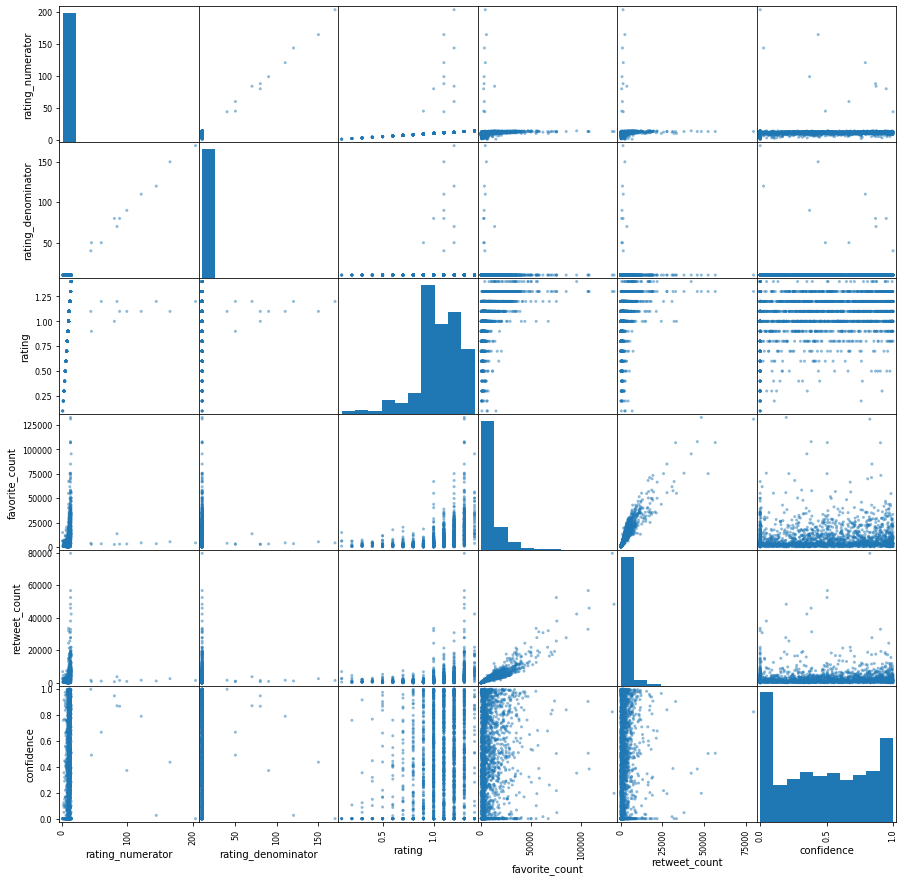

In [97]:

pd.plotting.scatter_matrix(rate_dogs, figsize=(15,15));

# this indicates a linear relationship between favorite and retweet_count
# there also seems to be a relationship between rating and favorite/retweet count
# there are outliers in favorite and retweet count

In [98]:
rate_dogs.describe()

,rating_numerator,rating_denominator,rating,favorite_count,retweet_count,confidence
count,1967.000000,1967.000000,1967.000000,1967.000000,1967.000000,1967.000000
mean,11.068124,10.457550,1.055363,8944.905948,2783.912557,0.466718
std,8.089431,6.795524,0.215334,12274.770541,4702.218689,0.339351
min,1.000000,10.000000,0.100000,81.000000,16.000000,0.000000
25%,10.000000,10.000000,1.000000,1983.000000,627.500000,0.142294
50%,11.000000,10.000000,1.100000,4138.000000,1366.000000,0.461164
75%,12.000000,10.000000,1.200000,11402.500000,3232.500000,0.777087
max,204.000000,170.000000,1.400000,132810.000000,79515.000000,0.999956


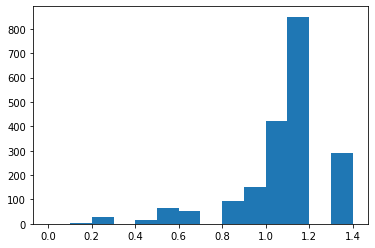

In [99]:
# distribution of rating
bin_edges = np.arange(0, 1.41, 0.1)
plt.hist(rate_dogs.rating, bins = bin_edges);
# there are a few ratings below 1, the most between 1 and 1.2
# the distribution is left skewed

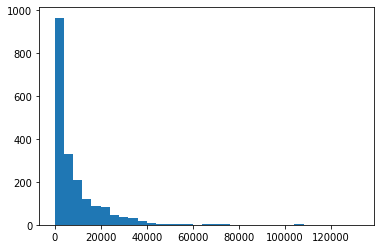

In [100]:
# favorite counts and retweet counts
# distribution
bin_edges = np.arange(0, 133000, 4000)
plt.hist(rate_dogs.favorite_count, bins = bin_edges);

# right skewed, with outliers




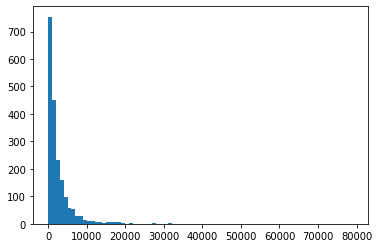

In [101]:
bin_edges = np.arange(0, 80000,1000)
plt.hist(rate_dogs.retweet_count, bins = bin_edges);



In [102]:
# the dog with highest rating
max_rating = rate_dogs.rating.max()
rate_dogs[rate_dogs.rating == max_rating]
# highest rating was 1.4, there are many dogs 


,tweet_id,timestamp,weekday,source,tweet_urls,jpg_url,img_num,text,name,stage,rating_numerator,rating_denominator,rating,favorite_count,retweet_count,breed,confidence,in_prediction
9,890240255349198849,2017-07-26 15:59:51+00:00,Wednesday,Twitter for iPhone,https://twitter.com/dog_rates/status/890240255349198849/photo/1,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate https://t.co/t1bfwz5S2A,Cassie,doggo,14,10,1.4,32467,7711,Pembroke,0.511319,1
21,887517139158093824,2017-07-19 03:39:09+00:00,Wednesday,Twitter for iPhone,https://twitter.com/dog_rates/status/887517139158093824/video/1,https://pbs.twimg.com/ext_tw_video_thumb/887517108413886465/pu/img/WanJKwssZj4VJvL9.jpg,1,I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,None,None,14,10,1.4,46959,12082,Unknown,0.000000,0
36,884441805382717440,2017-07-10 15:58:53+00:00,Monday,Twitter for iPhone,https://twitter.com/dog_rates/status/884441805382717440/photo/1,https://pbs.twimg.com/media/DEYrIZwWsAA2Wo5.jpg,1,"I present to you, Pup in Hat. Pup in Hat is great for all occasions. Extremely versatile. Compact as h*ck. 14/10 (IG: itselizabethgales) https://t.co/vvBOcC2VdC",None,None,14,10,1.4,27478,5856,Pembroke,0.993225,1
39,883482846933004288,2017-07-08 00:28:19+00:00,Saturday,Twitter for iPhone,"https://twitter.com/dog_rates/status/883482846933004288/photo/1, https://twitter.com/dog_rates/status/883482846933004288/photo/1",https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,1,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",Bella,None,14,10,1.4,46860,10407,Golden Retriever,0.943082,1
49,881536004380872706,2017-07-02 15:32:16+00:00,Sunday,Twitter for iPhone,https://twitter.com/dog_rates/status/881536004380872706/video/1,https://pbs.twimg.com/ext_tw_video_thumb/881535971568889856/pu/img/9bawiZ--8FKywTkz.jpg,1,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,None,pupper,14,10,1.4,50199,16570,Samoyed,0.281463,1
64,878057613040115712,2017-06-23 01:10:23+00:00,Friday,Twitter for iPhone,"https://twitter.com/dog_rates/status/878057613040115712/photo/1, https://twitter.com/dog_rates/status/878057613040115712/photo/1",https://pbs.twimg.com/media/DC98vABUIAA97pz.jpg,1,This is Emmy. She was adopted today. Massive round of pupplause for Emmy and her new family. 14/10 for all involved https://t.co/cwtWnHMVpe,Emmy,None,14,10,1.4,42876,7181,French Bulldog,0.839097,1
95,870063196459192321,2017-05-31 23:43:25+00:00,Wednesday,Twitter for iPhone,"https://twitter.com/dog_rates/status/870063196459192321/photo/1, https://twitter.com/dog_rates/status/870063196459192321/photo/1",https://pbs.twimg.com/media/DBMV3NnXUAAm0Pp.jpg,1,Meet Clifford. He's quite large. Also red. Good w kids. Somehow never steps on them. Massive poops very inconvenient. Still 14/10 would ride https://t.co/apVOyDgOju,Clifford,None,14,10,1.4,37771,8840,Unknown,0.000000,0
100,868880397819494401,2017-05-28 17:23:24+00:00,Sunday,Twitter for iPhone,https://twitter.com/dog_rates/status/868880397819494401/photo/1,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,This is Walter. He won't start hydrotherapy without his favorite floatie. 14/10 keep it pup Walter https://t.co/r28jFx9uyF,Walter,None,14,10,1.4,55098,12518,French Bulldog,0.099984,2
113,864873206498414592,2017-05-17 16:00:15+00:00,Wednesday,Twitter for iPhone,"https://twitter.com/dog_rates/status/864873206498414592/photo/1, https://twitter.com/dog_rates/status/864873206498414592/photo/1",https://pbs.twimg.com/media/DAClmHkXcAA1kSv.jpg,2,We only rate dogs. Please don't send in Jesus. We're trying to remain professional and legitimate. Thank you... 14/10 https://t.co/wr3xsjeCIR,None

In [103]:
#dog with lowest rating
rating_min = rate_dogs.rating.min()
rate_dogs[rate_dogs.rating == rating_min]
# mostly pictures with no dogs

,tweet_id,timestamp,weekday,source,tweet_urls,jpg_url,img_num,text,name,stage,rating_numerator,rating_denominator,rating,favorite_count,retweet_count,breed,confidence,in_prediction
1501,675153376133427200,2015-12-11 03:21:23+00:00,Friday,Twitter for iPhone,https://twitter.com/dog_rates/status/675153376133427200/photo/1,https://pbs.twimg.com/media/CV6gaUUWEAAnETq.jpg,1,What kind of person sends in a picture without a dog in it? 1/10 just because that's a nice table https://t.co/RDXCfk8hK0,None,None,1,10,0.1,6072,2734,Unknown,0.0,0
1713,670783437142401025,2015-11-29 01:56:48+00:00,Sunday,Twitter for iPhone,https://twitter.com/dog_rates/status/670783437142401025/photo/1,https://pbs.twimg.com/media/CU8Z-OxXAAA-sd2.jpg,1,Flamboyant pup here. Probably poisonous. Won't eat kibble. Doesn't bark. Slow af. Petting doesn't look fun. 1/10 https://t.co/jxukeh2BeO,None,None,1,10,0.1,872,431,Unknown,0.0,0
1877,667549055577362432,2015-11-20 03:44:31+00:00,Friday,Twitter Web Client,https://twitter.com/dog_rates/status/667549055577362432/photo/1,https://pbs.twimg.com/media/CUOcVCwWsAERUKY.jpg,1,Never seen dog like this. Breathes heavy. Tilts head in a pattern. No bark. Shitty at fetch. Not even cordless. 1/10 https://t.co/i9iSGNn3fx,None,None,1,10,0.1,6138,2454,Unknown,0.0,0
1953,666104133288665088,2015-11-16 04:02:55+00:00,Monday,Twitter for iPhone,https://twitter.com/dog_rates/status/666104133288665088/photo/1,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/Asgdc6kuLX,None,None,1,10,0.1,14765,6871,Unknown,0.0,0


In [104]:
# most favorite count
favorite_max = rate_dogs.favorite_count.max()
rate_dogs[rate_dogs.favorite_count == favorite_max]

,tweet_id,timestamp,weekday,source,tweet_urls,jpg_url,img_num,text,name,stage,rating_numerator,rating_denominator,rating,favorite_count,retweet_count,breed,confidence,in_prediction
306,822872901745569793,2017-01-21 18:26:02+00:00,Saturday,Twitter for iPhone,https://twitter.com/dog_rates/status/822872901745569793/photo/1,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1,Here's a super supportive puppo participating in the Toronto #WomensMarch today. 13/10 https://t.co/nTz3FtorBc,None,puppo,13,10,1.3,132810,48265,Lakeland Terrier,0.196015,1


In [105]:
# who has least favorite counts
favorite_min = rate_dogs.favorite_count.min()
rate_dogs[rate_dogs.favorite_count == favorite_min]

,tweet_id,timestamp,weekday,source,tweet_urls,jpg_url,img_num,text,name,stage,rating_numerator,rating_denominator,rating,favorite_count,retweet_count,breed,confidence,in_prediction
1954,666102155909144576,2015-11-16 03:55:04+00:00,Monday,Twitter for iPhone,https://twitter.com/dog_rates/status/666102155909144576/photo/1,https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg,1,Oh my. Here you are seeing an Adobe Setter giving birth to twins!!! The world is an amazing place. 11/10 https://t.co/11LvqN4WLq,None,None,11,10,1.1,81,16,English Setter,0.298617,1


In [106]:
# who has max retweet counts
retweet_max = rate_dogs.retweet_count.max()
rate_dogs[rate_dogs.retweet_count == retweet_max]
# most retweeted post is a video of a dog in a pool

,tweet_id,timestamp,weekday,source,tweet_urls,jpg_url,img_num,text,name,stage,rating_numerator,rating_denominator,rating,favorite_count,retweet_count,breed,confidence,in_prediction
769,744234799360020481,2016-06-18 18:26:18+00:00,Saturday,Twitter for iPhone,https://twitter.com/dog_rates/status/744234799360020481/video/1,https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg,1,Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4,None,doggo,13,10,1.3,131075,79515,Labrador Retriever,0.825333,1


In [107]:
# who has the least retweet counts
retweet_min = rate_dogs.retweet_count.min()
rate_dogs[rate_dogs.retweet_count == retweet_min]
# same as regarding favorites

,tweet_id,timestamp,weekday,source,tweet_urls,jpg_url,img_num,text,name,stage,rating_numerator,rating_denominator,rating,favorite_count,retweet_count,breed,confidence,in_prediction
1954,666102155909144576,2015-11-16 03:55:04+00:00,Monday,Twitter for iPhone,https://twitter.com/dog_rates/status/666102155909144576/photo/1,https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg,1,Oh my. Here you are seeing an Adobe Setter giving birth to twins!!! The world is an amazing place. 11/10 https://t.co/11LvqN4WLq,None,None,11,10,1.1,81,16,English Setter,0.298617,1


The dog with the least favorite and retweet counts

![The pic with the least counts](least_counts.jpg)

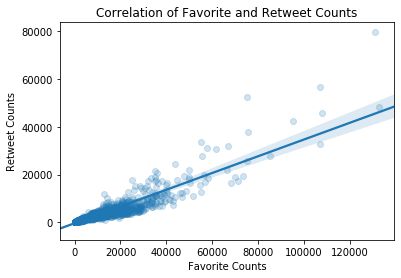

In [108]:
# relationship of favorite and retweet counts and ratings



sns.regplot(data = rate_dogs, x = 'favorite_count', y = 'retweet_count', scatter_kws={'alpha':0.2});

plt.xlabel('Favorite Counts')
plt.ylabel('Retweet Counts')
plt.title('Correlation of Favorite and Retweet Counts');

# seems that logarithmic scale would fit better, has to set fit_reg to False


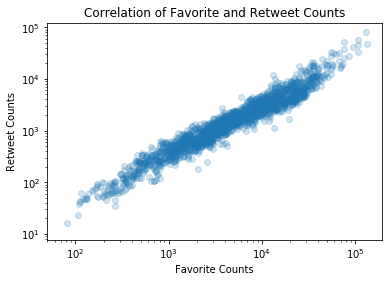

In [109]:
sns.regplot(data = rate_dogs, x = 'favorite_count', y = 'retweet_count', scatter_kws={'alpha':0.2}, fit_reg=False);
# seems that logarithmic scale would fit better, has to set fit_reg to False
plt.xscale('log');
plt.xlabel('Favorite Counts')
plt.yscale('log')
plt.ylabel('Retweet Counts')
plt.title('Correlation of Favorite and Retweet Counts');


# there is a high correlation, as would be expected



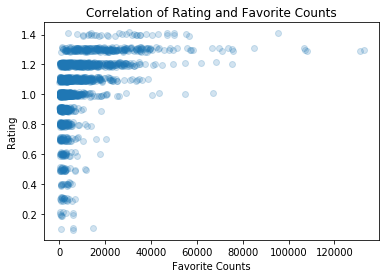

In [110]:
sns.regplot(data = rate_dogs, x = 'favorite_count', y = 'rating',y_jitter=0.015, scatter_kws={'alpha':0.2}, fit_reg=False);
#plt.xscale('log');
plt.xlabel('Favorite Counts')
plt.ylabel('Rating')
plt.title('Correlation of Rating and Favorite Counts');


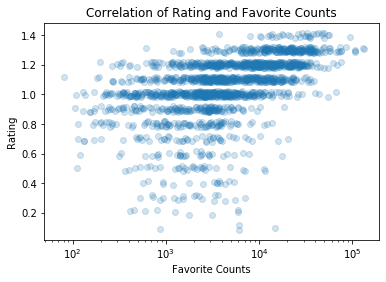

In [111]:
sns.regplot(data = rate_dogs, x = 'favorite_count', y = 'rating', y_jitter=0.02, scatter_kws={'alpha':0.2}, fit_reg=False);
plt.xscale('log');
plt.xlabel('Favorite Counts')
plt.ylabel('Rating')
plt.title('Correlation of Rating and Favorite Counts');
# there is a correlation seen but only on higher ratings and not so strong

In [112]:
rate_dogs.stage.value_counts()


None       1664
pupper     201 
doggo      63  
puppo      22  
several    10  
floofer    7   
Name: stage, dtype: int64

In [113]:
# are there differences in the favorite counts and retweet counts of the dog stages?

rate_dogs.groupby('stage')['favorite_count', 'retweet_count'].describe()



#base_color = sb.color_palette()[0]
#sb.barplot(data = df, x = 'cat_var', y = 'num_var', color = base_color)
#sb.countplot(data = df, x = 'cat_var1', hue = 'cat_var2')

favorite_count                                                        \
                 count          mean           std     min      25%      50%   
stage                                                                          
None     1664.0         8521.515625   11265.521341  81.0    1683.50  3912.5    
doggo    63.0           19356.380952  22208.483825  2593.0  8268.00  12376.0   
floofer  7.0            13206.000000  11258.315105  2262.0  5045.50  11302.0   
pupper   201.0          7250.527363   10743.931650  693.0   2449.00  3275.0    
puppo    22.0           21582.090909  28034.339585  3277.0  7043.50  13387.5   
several  10.0           17077.200000  15725.294965  4849.0  8799.25  10021.5   

                            retweet_count                                     \
              75%       max         count         mean           std     min   
stage                                                                          
None     11092.00  107956.0  1664.0        2592.030649  3959.264861   16.0     
doggo    20502.50  131075.0  63.0          7125.698413  12868.874516  725.0    
floofer  17721.00  33345.0   7.0           4968.714286  6163.579715   496.0    
pupper   7842.00   106827.0  201.0         2382.502488  3584.033641   103.0    
puppo    19691.25  132810.0  22.0          6473.954545  10301.927187  716.0    
several  15852.00  47844.0   10.0          5780.700000  6697.135524   1265.0   

                                            
             25%     50%      75%      max  
stage                                       
None     584.75   1311.0  3115.25  56625.0  
doggo    2025.50  3327.0  5422.00  79515.0  
floofer  1825.00  3265.0  4436.50  18497.0  
pupper   695.00   1219.0  2475.00  32883.0  
puppo    1712.50  3130.0  6284.25  48265.0  
several  2453.00  2822.5  3498.25  19196.0

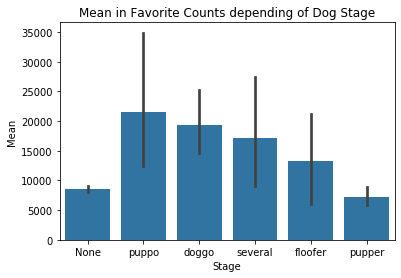

In [114]:
base_color = sns.color_palette()[0]
order = ['None', 'puppo', 'doggo', 'several', 'floofer', 'pupper']

sns.barplot(data=rate_dogs, x='stage', y='favorite_count', order= order, color=base_color );
plt.xlabel('Stage');
plt.ylabel('Mean');
plt.title('Mean in Favorite Counts depending of Dog Stage');

# Nearly all stages seem to be more favored, except pupper.
# limitation: small group sizes of most dog stages

In [115]:
# what are the  most tweeted dog breeds
# creating a subset with only breed data
breeds = rate_dogs[rate_dogs.breed != 'Unknown']


breeds.breed.value_counts()

# the algorithm found 113 different dog breeds. The most common is Golden Retriever, Labrador Retriever, Pembroke and Chihuahua also are common
# In 303 cases, no dog was recognized.
# There are 21 breeds with at least 20 tweets

Golden Retriever        155
Labrador Retriever      106
Pembroke                94 
Chihuahua               90 
Pug                     62 
                        .. 
Bouvier Des Flandres    1  
Silky Terrier           1  
Irish Wolfhound         1  
Japanese Spaniel        1  
Unknown                 0  
Name: breed, Length: 114, dtype: int64

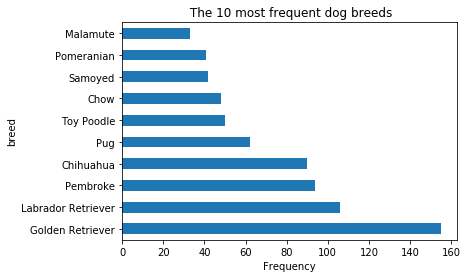

In [116]:
# barplot of the 10 most frequent dog breeds

data = breeds.groupby('breed').count()['favorite_count'].sort_values().nlargest(10).plot(kind = 'barh', color=base_color);
plt.title(' The 10 most frequent dog breeds');
plt.xlabel('Frequency');



In [117]:
# the 10 highest rated breeds
breeds.groupby('breed')['rating'].mean().sort_values(ascending=False)[:10]


breed
Bouvier Des Flandres    1.300000
Saluki                  1.250000
Briard                  1.233333
Tibetan Mastiff         1.225000
Border Terrier          1.214286
Silky Terrier           1.200000
Standard Schnauzer      1.200000
Gordon Setter           1.175000
Irish Setter            1.175000
Samoyed                 1.169048
Name: rating, dtype: float64

In [118]:
# the 10 breeds with highest favorite counts
breeds.groupby('breed')['favorite_count'].mean().sort_values(ascending=False)[:10]

breed
Saluki                     24060.000000
Bedlington Terrier         21153.166667
French Bulldog             18416.806452
Bouvier Des Flandres       18032.000000
Afghan Hound               17326.666667
Black-And-Tan Coonhound    17012.000000
Flat-Coated Retriever      16791.625000
Irish Water Spaniel        16400.000000
Leonberg                   14934.333333
English Springer           14138.300000
Name: favorite_count, dtype: float64

I tried to create a subframe containing only the dog breeds with at least 20 tweets, but couldn't figure it out. Would be glad about some tips :-)

In [119]:
# lowest confidence in prediction
conf_min = rate_dogs[rate_dogs.confidence >0].confidence.min()
rate_dogs[rate_dogs.confidence == conf_min]

,tweet_id,timestamp,weekday,source,tweet_urls,jpg_url,img_num,text,name,stage,rating_numerator,rating_denominator,rating,favorite_count,retweet_count,breed,confidence,in_prediction
694,752519690950500352,2016-07-11 15:07:30+00:00,Monday,Twitter for iPhone,"https://twitter.com/dog_rates/status/752519690950500352/photo/1, https://twitter.com/dog_rates/status/752519690950500352/photo/1, https://twitter.com/dog_rates/status/752519690950500352/photo/1",https://pbs.twimg.com/media/CnF8qVDWYAAh0g1.jpg,3,Hopefully this puppo on a swing will help get you through your Monday. 11/10 would push https://t.co/G54yClasz2,None,puppo,11,10,1.1,8157,3917,Labrador Retriever,0.00001,2


In [120]:
# highest confidence in prediction
conf_max = rate_dogs.confidence.max()
rate_dogs[rate_dogs.confidence == conf_max]

,tweet_id,timestamp,weekday,source,tweet_urls,jpg_url,img_num,text,name,stage,rating_numerator,rating_denominator,rating,favorite_count,retweet_count,breed,confidence,in_prediction
1823,668636665813057536,2015-11-23 03:46:18+00:00,Monday,Twitter for iPhone,https://twitter.com/dog_rates/status/668636665813057536/photo/1,https://pbs.twimg.com/media/CUd5gBGWwAA0IVA.jpg,1,This is an Irish Rigatoni terrier named Berta. Completely made of rope. No eyes. Quite large. Loves to dance. 10/10 https://t.co/EM5fDykrJg,None,None,10,10,1.0,1114,528,Komondor,0.999956,1


Not adressed in the report, stopped analysis due to time limit.

In [121]:
rate_dogs.source.value_counts()
# most use twitter app, the elder Web client and TweetDeck are not important

Twitter for iPhone    1929
Twitter Web Client    28  
TweetDeck             10  
Name: source, dtype: int64

In [122]:
rate_dogs.name.value_counts()[:6]
# the most common name is Charlie, followed by Lucy, Oliver and Cooper

None       620
Charlie    11 
Lucy       10 
Cooper     10 
Oliver     10 
Tucker     9  
Name: name, dtype: int64

In [123]:
rate_dogs.img_num.value_counts()
# several tweets with more than on pic, is there a relation to likes and retweets?

1    1689
2    190 
3    58  
4    30  
Name: img_num, dtype: int64

In [124]:
rate_dogs.in_prediction.value_counts()

1    1462
0    303 
2    142 
3    60  
Name: in_prediction, dtype: int64